<a href="https://colab.research.google.com/github/manojkumarshenu/CognoRise/blob/main/Unemployment_in_india(Tast1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/almabetter 1/cognoRise_datasets&task/Unemployment in India.csv')



In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.shape

(768, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df[' Date'] = pd.to_datetime(df[' Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


<ipython-input-6-1cfb1ea72026>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [ ]:
df.isnull().sum()
New_df = df.copy()
New_df['Region'] = New_df['Region'].fillna(method='ffill')
New_df[' Date'] = pd.to_datetime(New_df[' Date'].fillna(method='bfill'))
New_df[' Frequency'] = New_df[' Frequency'].fillna(method='ffill')
New_df[' Estimated Unemployment Rate (%)'] = New_df[' Estimated Unemployment Rate (%)'].fillna(New_df[' Estimated Unemployment Rate (%)'].mean())
New_df[' Estimated Employed'] = New_df[' Estimated Employed'].fillna(New_df[' Estimated Employed'].mean())
New_df[' Estimated Labour Participation Rate (%)'] = New_df[' Estimated Labour Participation Rate (%)'].fillna(New_df[' Estimated Labour Participation Rate (%)'].mean())
New_df['Area'] = New_df['Area'].fillna(method='ffill')
New_df.isnull().sum()

Region                                       0
 Date                                       14
 Frequency                                   0
 Estimated Unemployment Rate (%)             0
 Estimated Employed                          0
 Estimated Labour Participation Rate (%)     0
Area                                         0
dtype: int64

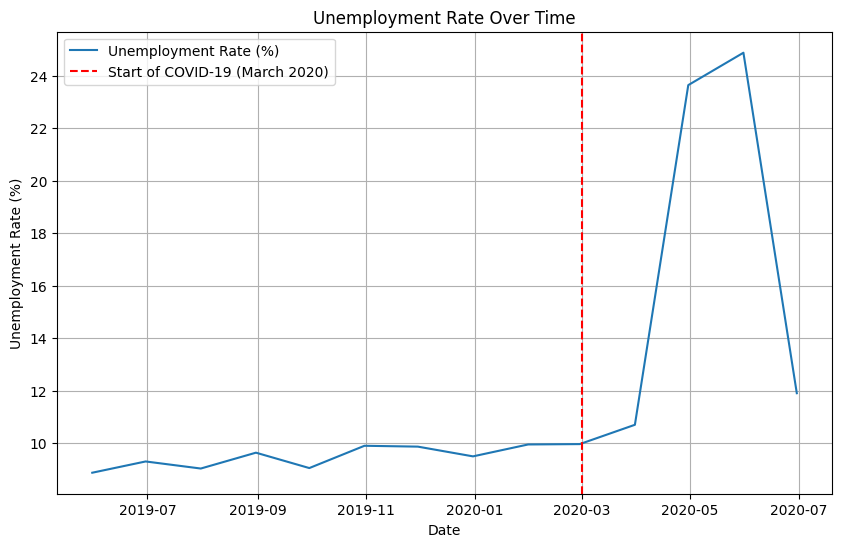

In [ ]:
# Sort data by Date
New_df.sort_values(by=' Date', inplace=True)


# Filter data for COVID-19 period (from March 2020 onwards)
covid_start_date = pd.to_datetime('2020-03-01')
data_covid = New_df[New_df[' Date'] >= covid_start_date]
mean_unemployment_over_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean()

# Plot the overall trend of the unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, label='Unemployment Rate (%)')
plt.axvline(covid_start_date, color='r', linestyle='--', label='Start of COVID-19 (March 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()